# Data conversion

The original nirHiss light curves are stored in a way that is a bit slow to read. This notebook transforms the data into arrays that are faster to work with. 

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import xarray as xa
import astropy.io.fits as pf

In [4]:
def read_data(fname, chstart, chend):
    df = xa.load_dataset(fname).to_dataframe()
    fluxes = array([df[f'light_curve_channel_{i:04d}'].values for i in range(chstart, chend)])
    errors = array([df[f'light_curve_error_channel_{i:04d}'].values for i in range(chstart, chend)])
    wavelength = array([df[f'wavelength_channel_{i:04d}'].values for i in range(chstart, chend)]).mean(1)
    time = df.time.values
    return time, wavelength, fluxes, errors

## Order 1

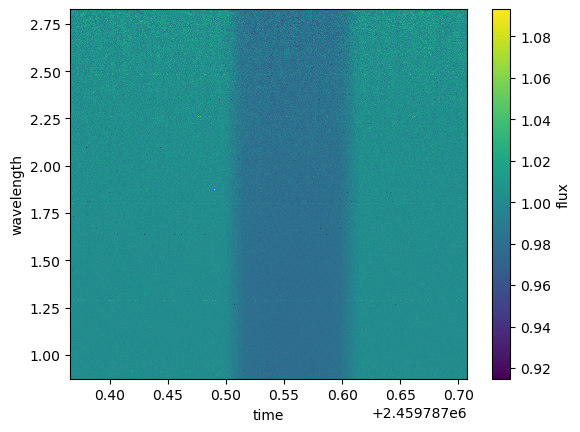

In [35]:
t, w, f, e = read_data('data/nirHiss_spectroscopic_light_curves_order_1.h5', 0, 2012)
fa = xa.DataArray(f, name='flux', dims=('wavelength', 'time'), coords=(w, t))
ea = xa.DataArray(e, name='error', dims=('wavelength', 'time'), coords=(w, t))
ds = xa.Dataset(dict(flux=fa, error=ea))
ds.to_netcdf('data/nirHiss_order_1.h5')
ds.flux.plot();

## Order 2

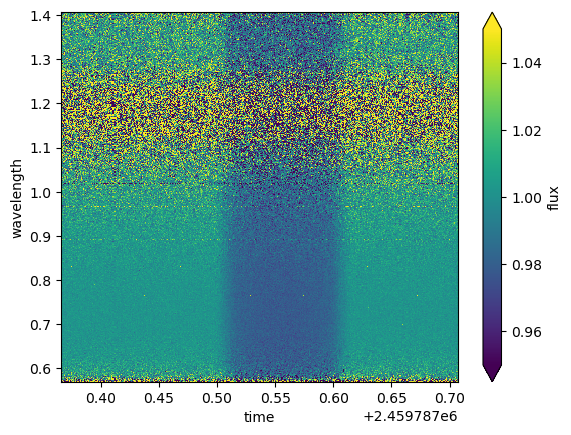

In [50]:
t, w, f, e = read_data('data/nirHiss_spectroscopic_light_curves_order_2.h5', 217, 1994+45)
fa = xa.DataArray(f, name='flux', dims=('wavelength', 'time'), coords=(w, t))
ea = xa.DataArray(e, name='error', dims=('wavelength', 'time'), coords=(w, t))
ds = xa.Dataset(dict(flux=fa, error=ea))
ds.to_netcdf('data/nirHiss_order_2.h5')
ds.flux.plot(vmin=0.95, vmax=1.05);

---

<center>&copy;2024 Hannu Parviainen</center>